# HW04  <font color=red>(제출기한-5월26일 자정)</font>
- <font color=red> 지각제출 : 0점 </font>
---
Datascience 이해도 평가를 위한 문제입니다. 


> 작성방법 

- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 답안은 한 코드셀 내에 작성하며 여러줄로 작성해도 무방합니다.
- 출력결과가 미리 제시된 셀(<font color=red>'수정하지 마시오'</font>라고 표시된 셀)을 참고하여 코드를 작성하시오. 
- <font color=red>'수정하지 마시오'</font>라고 적힌 코드 셀은 절대로 지우면 안 됩니다.
- <font color=red> 불필요한 출력을 하는 코드</font>를 작성하면 0점 처리됩니다.
- Table에 관한 문제는 특별한 언급이 없을 경우 <font color=red> row와 column 순서가 출력 결과 예시와 동일</font>하게 합니다. 

> 제출방법

- ULMS HW4 제출란에 <font color=red>'HW04-학번.ipynb'</font>(본인학번)을 기한내 업로드합니다.
- <font color=red> 제출형식 오류 : 0점 <font>


In [57]:
### 지우지 마시오.
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.random.seed(0)
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

## 수업시간에 사용하였던 다음 NBA 연봉 데이터를 이용합니다.

In [58]:
### 지우지 마시오.
nba_salary = Table.read_table(fpath+'nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY').select(1,3)
nba_salary

POSITION,SALARY
PF,18.6717
C,12
C,9.75625
PG,8
SG,5.74648
SF,4
PF,3.33333
SF,2
PG,1.7634
SG,1.30452


### 문제1
POSITION이 C인 선수들의 수를 구하여 ``noplayers_C`` 변수에  저장하시오.

In [59]:
### 답안을 작성하시오.
noplayers_C = nba_salary.group('POSITION').take(0).column('count')[0]
noplayers_C

69

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
noplayers_C

69

### 문제2
POSITION이 C인 선수들의 Salary median 구하여 ``salarymedian_C`` 변수에  저장하시오.

In [60]:
### 답안을 작성하시오.
salarymedian_C = nba_salary.group('POSITION', np.median).take(0).column('SALARY median')[0]
salarymedian_C

4.2042

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
salarymedian_C

4.2042

### 문제3
전체 선수 중 POSITION이 ``C``인 선수 수 만큼 랜덤하게 sampling 한 후 SALARY의 median을 계산하는 시행을 10000번 반복하고 그 분포를 이후에 알아보고자 한다. 이를 위해 table이름, table내  label이름, sample의 수, repetition횟수를 인자로 받아 시뮬레이션을 하여 얻은 median들의 결과 array를 리턴하는 함수 ``s_median``를 작성하시오. 

- 수업시간에 배운 permuted_sample_average_difference 함수 구현을 참고할 것 
- 아래 주어진 함수 헤더를 그대로 사용할 것
- without replacement 시행을 구현할 것


In [61]:
def s_median(table, label, no_sample, repetitions):
### 답안을 작성하시오.
## sampling 개수 = POSITION이 C인 선수 수
## sampling 횟수 = 만번
## sampling 대상 = SALARY의 median 계산
## s_medain(table, label, C 선수의 수, 반복 횟수)
    tbl = table.select(label)
    outcome = make_array() 
    for i in np.arange(repetitions):
        sdata = np.median(tbl.sample(no_sample, with_replacement = False).column(label))

        outcome = np.append(outcome, sdata)
    
    return outcome


results = s_median(nba_salary, 'SALARY', noplayers_C, 10000)
results

array([3.39828 , 2.144772, 3.1566  , ..., 3.42551 , 2.89176 , 4.236287])

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
results = s_median(nba_salary, 'SALARY', noplayers_C, 10000)
results

array([3.39828 , 2.144772, 3.1566  , ..., 3.42551 , 2.89176 , 4.236287])

### 문제4
위 ``results`` 배열은 POSITION이 ``C``인 경우에 대해 시뮬레이션을 한 경우이다. 결과에 대한 historgram을 그려보시오. 
- x축의 타이틀을 ``Sample Median``으로 표시할 것
- ``salarymedian_C``을 이용하여 관측값(POSITION이 ``C``인 선수들의 median)을 Ch12의 예제처럼 붉은색 원(크기는 100)으로 표시할 것

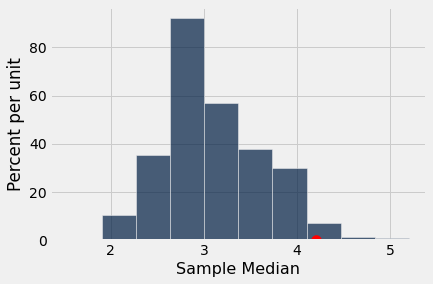

In [62]:
### 답안을 작성하시오. (그래프 그리기)
Table().with_column('Sample Median', results).hist()
plots.scatter(salarymedian_C, 0, color='red', s=100)

### 문제5
Null hypothesis가 "POSITION이 ``C``인 선수들의 SALARY median이 전체 선수들과 다르지 않다"이고 Alternative hypothesis가 "POSITION이 ``C``인 선수들의 SALARY median이 다른 선수들에 비해 크다"이다.

앞에서 구한 시뮬레이션 결과 ``results``를 이용하여 null hypothesis를 기각하려 할 때 ``p-value``를 계산하여 ``p_val`` 변수에 저장하시오. 
- 수업내용을 따라 equality(=)를 포함할 것

In [63]:
### 답안을 작성하시오.
p_val = np.count_nonzero(results >= salarymedian_C)/10000
p_val

0.0273

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
p_val

0.0273

### 문제6
``nba_salary`` Table에서 POSITION이 PF 또는 SF인 경우만을 선택하여 ``PFSF_salary`` Table 변수에 저장하시오.  

In [64]:
### 답안을 작성하시오.
PFSF_salary = nba_salary.where('POSITION', are.containing('F'))
PFSF_salary

POSITION,SALARY
PF,18.6717
SF,4
PF,3.33333
SF,2
SF,6.79612
PF,5
SF,2.03821
PF,1.17096
SF,24.8949
PF,11.236


### 문제7
PF의 salary median에서 SF의 salary median을 뺀 값을 ``observed``변수에 저장하시오. 

In [65]:
### 답안을 작성하시오.
observed = PFSF_salary.group('POSITION', np.median).column(1)[0] - PFSF_salary.group('POSITION', np.median).column(1)[1]
observed

0.6410469999999995

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
observed

0.6410469999999995

### 문제8
위 ``PFSF_salary`` Table에 대하여 shuffling 한 후 PF salary median에서 SF salary median을 뺀 값을 구하는 시행을 10000번 반복하여 그 결과를 collection array에 저장하려고 한다. 

이를 위해 Ch12 에서 배운 ``permuted_sample_average_difference``을 적절하게 변경하여 ``permuted_sample_median_difference``를 작성하시오. 


In [67]:
def permuted_sample_median_difference(table, label, group_label, repetitions):
    ### 답안을 작성하시오.
    tbl = table.select(group_label, label)
    collections = make_array()
    for i in np.arange(repetitions):
        shffuled = tbl.sample().column(1)

        suffled_mid = tbl.group(group_label, np.median).column(1)
        collections = np.append(collections, suffled_mid[0]-suffled_mid[1])
    return collections

shuffle_results = permuted_sample_median_difference(PFSF_salary, 'SALARY', 'POSITION', 10000)
shuffle_results

array([0.641047, 0.641047, 0.641047, ..., 0.641047, 0.641047, 0.641047])

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
shuffle_results = permuted_sample_median_difference(PFSF_salary, 'SALARY', 'POSITION', 10000)
shuffle_results


array([ 0.61182  , -0.6815665, -0.4617265, ..., -0.6254935,  0.03706  ,
       -0.0095505])

### 문제9
위 ``shuffle_results`` 배열에 대해 historgram을 그려보시오. 

- x축의 타이틀을 Median Difference으로 표시할 것
- 관측값(즉 문제7에서 구한 observed 변수값)을 Ch12의 예제처럼 붉은색 원(크기는 100)으로 표시할 것

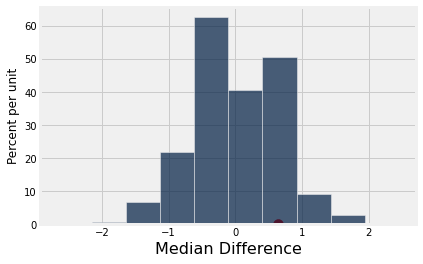

In [ ]:
### 답안을 작성하시오.


### 문제10
Null hypothesis가 "POSITION이 ``PF``인 선수들과 ``SF``가 salary에 관해 랜덤하게 나뉘었다"이고 Alternative hypothesis가 "POSITION이 ``PF``인 선수들의 SALARY median이 ``SF`` 선수들에 비해 크다"이다.

앞에서 구한 시뮬레이션 결과 ``shuffle_results``를 이용하여 null hypothesis를 기각하려 할 때 ``p-value``를 계산하여 ``p_val`` 변수에 저장하시오. 
- 수업내용을 따라 equality(=)를 포함할 것

In [ ]:
### 답안을 작성하시오.


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
p_val

0.1376